In [2]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from tqdm.notebook import tqdm
import multiprocessing as mp

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from analysis import *
from utils import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
backend = Aer.get_backend('qasm_simulator')

def parallel(args):
    model = args[0]
    x = args[1]
    y = args[2]
    verbose = args[3]
    
    model.train(x, y, epochs=25, verbose = verbose)
    
    return model

In [4]:
backend_santiago = pickle.load(open("backend_santiago", "rb"))

# Trainability, Ideal

## 1D, Gaussian Function

### Generate Data

In [ ]:
n = 100
x = np.linspace(0, 1, n).reshape(-1,1)
y = gaussian(x, 0.2, 0.01) - gaussian(x, 0.5, 0.01) + gaussian(x, 0.8, 0.01)

x_qcn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_dnn = scaler(x, mode="standard")
y = scaler(y, a=0, b=1)
print(y.shape)

In [ ]:
plt.plot(x_qcn, y, 'o')
plt.show()

### Training Models

In [ ]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [4, 4],
                         dim = [1, 4, 1],
                         encoder = Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=1),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend_santiago,
                         shots = 1024)
    
    qcn_list.append([qcn, x_qcn, y, False])

    
qcn_list[0][3] = True

with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list) 
    
    
saver(qcn_list, data_path("trainability_qcn_1D_reps_1_noisy"))

In [ ]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [4, 4],
                         dim = [1, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=2),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend_santiago,
                         shots=1024)
    
    qcn_list.append([qcn, x_qcn, y, False])

qcn_list[0][3] = True    
    
with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list)     
    
saver(qcn_list, data_path("trainability_qcn_1D_reps_2_noisy"))

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [1, 5, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=100)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_1D_epochs_100"))

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [1, 5, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=10000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_1D_epochs_10000"))

## 2D function

### Generate Data

In [5]:
np.random.seed(42)

n = 12
x = np.linspace(0, 1, n)
x = generate_meshgrid([x,x])

mean1 = np.array([[0.2, 0.8]])
var1 = np.array([[0.01, 0], [0, 0.01]])

mean2 = np.array([[0.5, 0.8]])
var2 = np.array([[0.01, 0], [0, 0.01]])

mean3 = np.array([[0.8, 0.8]])
var3 = np.array([[0.01, 0], [0, 0.01]])

mean4 = np.array([[0.2, 0.5]])
var4 = np.array([[0.01, 0], [0, 0.01]])

mean5 = np.array([[0.5, 0.5]])
var5 = np.array([[0.01, 0], [0, 0.01]])

mean6 = np.array([[0.8, 0.5]])
var6 = np.array([[0.01, 0], [0, 0.01]])

mean7 = np.array([[0.2, 0.2]])
var7 = np.array([[0.01, 0], [0, 0.01]])

mean8 = np.array([[0.5, 0.2]])
var8 = np.array([[0.01, 0], [0, 0.01]])

mean9 = np.array([[0.8, 0.2]])
var9 = np.array([[0.01, 0], [0, 0.01]])


y = gaussian(x, mean1, var1) - gaussian(x, mean2, var2) + gaussian(x, mean3, var3) - gaussian(x, mean4, var4) +\
gaussian(x, mean5, var5) - gaussian(x, mean6, var6) + gaussian(x, mean7, var7) - gaussian(x, mean8, var8) +\
gaussian(x, mean9, var9)


x_qcn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_dnn = scaler(x, mode="standard")
y = scaler(y, a=0, b=1)

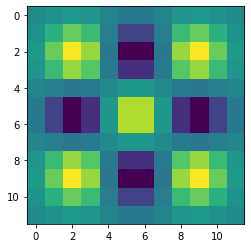

In [6]:
plt.imshow(y.reshape(n,n))
plt.show()

### Training Models

In [ ]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [4, 4, 4],
                         dim = [2, 4, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=1),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend_santiago,
                         shots=1024)
    qcn_list.append([qcn, x_qcn, y, False])
    
qcn_list[0][3] = True    
    
with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list)

saver(qcn_list, data_path("trainability_qcn_2D_reps_1_noisy"))

In [ ]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [4, 4, 4],
                         dim = [2, 4, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=2),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend_santiago,
                         shots=1024)
   
    qcn_list.append([qcn, x_qcn, y, False])

qcn_list[0][3] = True    
    
with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list)   
    
saver(qcn_list, data_path("trainability_qcn_2D_reps_2_noisy"))

In [ ]:
qcn_list = loader(data_path("trainability_qcn_2D_reps_2_noisy"))
qcn_list = [[qcn, x_qcn, y, False] for qcn in qcn_list]
qcn_list[0][3] = True  

with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list)   
    
saver(qcn_list, data_path("trainability_qcn_2D_reps_2_noisy_2"))

In [ ]:
qcn_list = loader(data_path("trainability_qcn_2D_reps_2_noisy_2"))
qcn_list = [[qcn, x_qcn, y, False] for qcn in qcn_list]
qcn_list[0][3] = True  

with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list)   
    
saver(qcn_list, data_path("trainability_qcn_2D_reps_2_noisy_3"))

epoch: 0, loss: 0.014248881094018808
epoch: 1, loss: 0.014563353734831752
epoch: 2, loss: 0.014233192160906606
epoch: 3, loss: 0.013763548402494415
epoch: 4, loss: 0.01320665931879265
epoch: 5, loss: 0.013293760031773327
epoch: 6, loss: 0.014063057064171717
epoch: 7, loss: 0.013741476972163543
epoch: 8, loss: 0.013065030750523367
epoch: 9, loss: 0.01252382458331512
epoch: 10, loss: 0.01258895114929391
epoch: 11, loss: 0.01222069549992553
epoch: 12, loss: 0.011623621251773988
epoch: 13, loss: 0.01163061594087947


In [ ]:
qcn_list = loader(data_path("trainability_qcn_2D_reps_2_noisy_3"))
qcn_list = [[qcn, x_qcn, y, False] for qcn in qcn_list]
qcn_list[0][3] = True  

with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list)   
    
saver(qcn_list, data_path("trainability_qcn_2D_reps_2_noisy_4"))

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [2, 5, 5, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=100)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_2D_epochs_100"))

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [2, 5, 5, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=10000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_2D_epochs_10000"))

## 3D function

### Generate Data

In [ ]:
np.random.seed(42)

n = 6
x = np.linspace(0, 1, n)
x = generate_meshgrid([x, x, x])

mean1 = np.array([[0.25, 0.25, 0.25]])
mean2 = np.array([[0.25, 0.25, 0.75]])
mean3 = np.array([[0.25, 0.75, 0.75]])
mean4 = np.array([[0.25, 0.75, 0.25]])

mean5 = np.array([[0.75, 0.25, 0.25]])
mean6 = np.array([[0.75, 0.25, 0.75]])
mean7 = np.array([[0.75, 0.75, 0.75]])
mean8 = np.array([[0.75, 0.75, 0.25]])

var = np.array([[0.02, 0, 0], [0, 0.02, 0], [0, 0, 0.02]])

y = gaussian(x, mean1, var) - gaussian(x, mean2, var) + gaussian(x, mean3, var) - gaussian(x, mean4, var) - gaussian(x, mean5, var) + gaussian(x, mean6, var) - gaussian(x, mean7, var) + gaussian(x, mean8, var)

x_qcn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_dnn = scaler(x, mode="standard")
y = scaler(y, a=0, b=1)
print(y.shape)

In [ ]:
plt.imshow(y.reshape(n,n,n)[0])
plt.show()

In [ ]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [5, 5, 5],
                         dim = [3, 5, 5, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps = 1),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend,
                         shots = 0)

    qcn_list.append([qcn, x_qcn, y, False])

qcn_list[0][3] = True    
    
with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list) 
    
saver(qcn_list, data_path("trainability_qcn_3D_reps_1"))

In [ ]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [5, 5, 5],
                         dim = [3, 5, 5, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps = 2),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend,
                         shots = 0)

    qcn_list.append([qcn, x_qcn, y, False])

qcn_list[0][3] = True    
    
with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list) 
    
saver(qcn_list, data_path("trainability_qcn_3D_reps_2"))

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [3, 8, 8, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=100)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_3D_epochs_100"))

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [3, 8, 8, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=10000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_3D_epochs_10000"))